In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [82]:
data = pd.read_csv("Company_Data (1).csv")

In [83]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [84]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [85]:
data["Sales"].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [86]:
SalesThreshold = data["Sales"].mean()

In [87]:
SalesThreshold

7.496325000000001

In [88]:
def categorize_sales(sales):
    if sales < SalesThreshold:
        return "low"
    else:
        return "High"


In [89]:
data["Sales_Category"] = data["Sales"].apply(categorize_sales)

In [90]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [91]:
data.isna().sum()

Sales             0
CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
Sales_Category    0
dtype: int64

<Axes: >

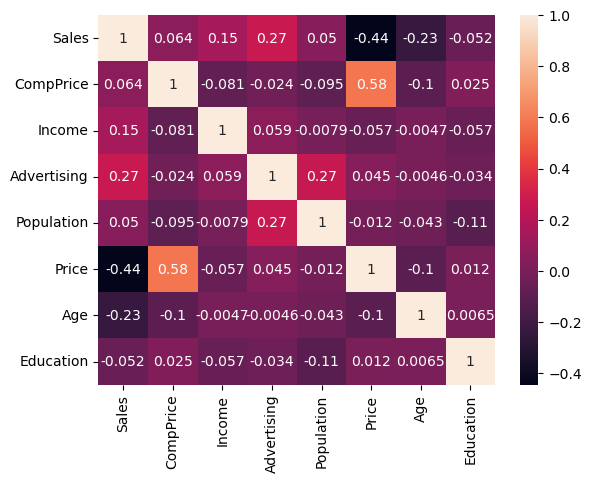

In [93]:
sns.heatmap(data= data.corr(),annot=True)

In [34]:
# Most of the features have negative coorelation except for price and Compprice



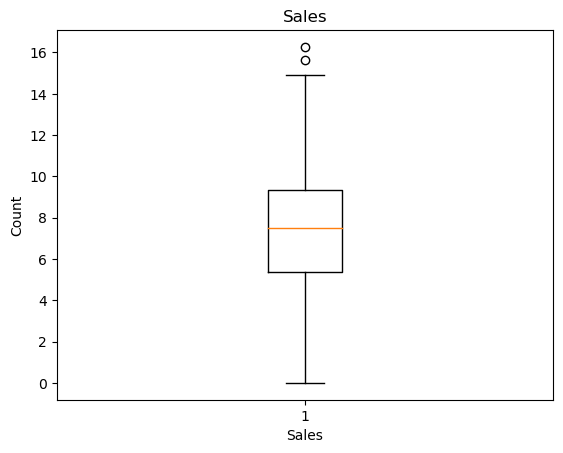

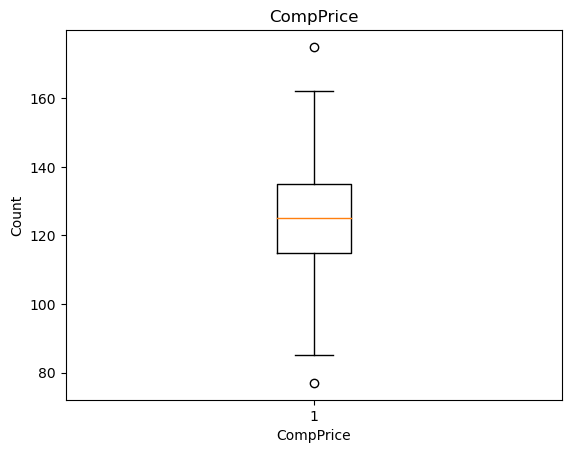

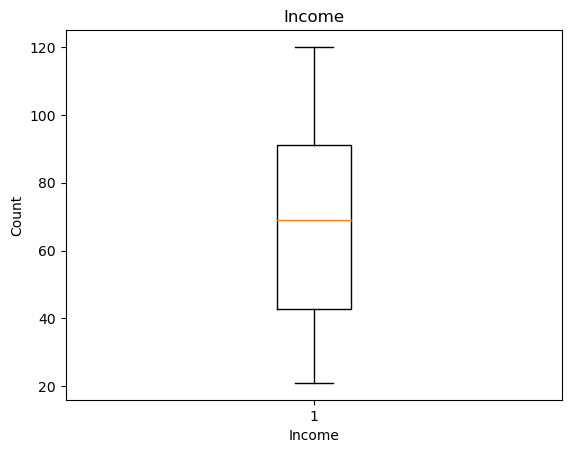

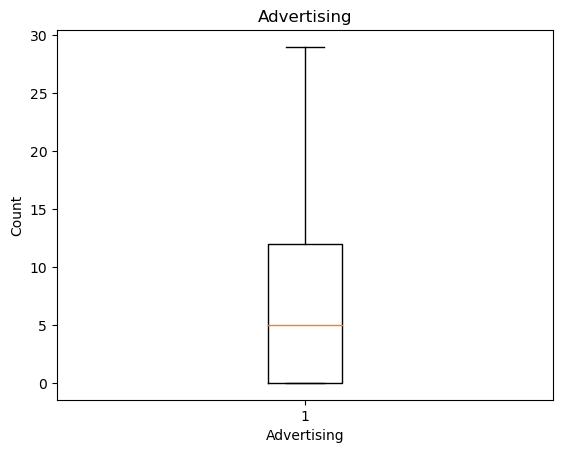

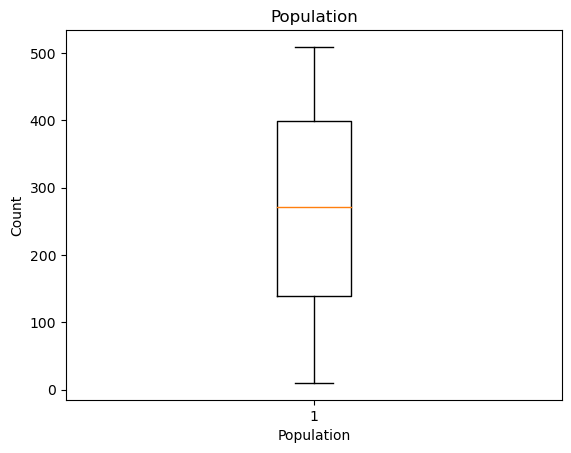

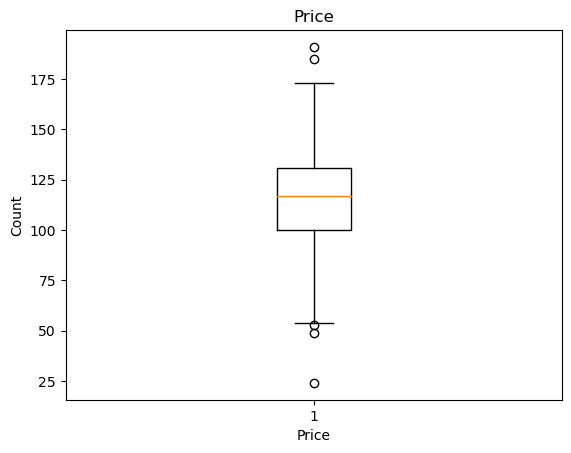

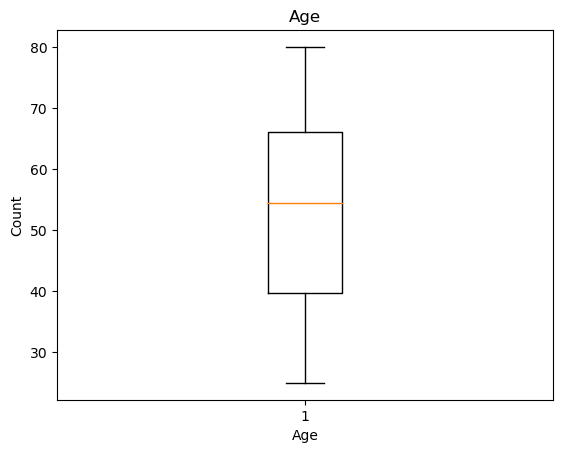

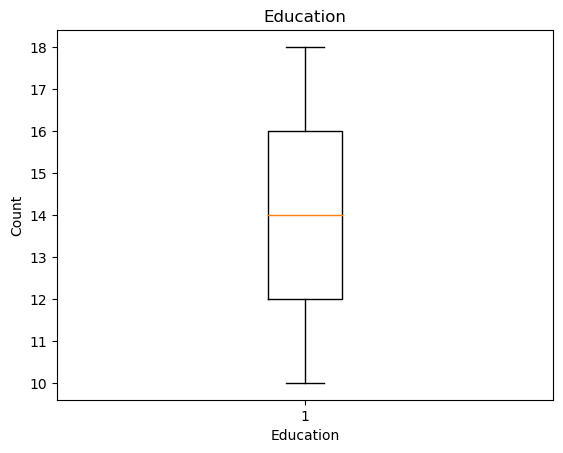

In [71]:
# Detecting Outliers
columns = list(data.columns)
for i in columns:
    if (data[i].dtypes==object):
        pass
    else:
        plt.title(i)
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.show()

In [94]:
# Sales , Price and Comprice has a couple of outliers.
# Now we use label encoder : on the target variable

label_encoder = preprocessing.LabelEncoder()

data["Sales_Category"] = label_encoder.fit_transform(data["Sales_Category"])

data["ShelveLoc"] = label_encoder.fit_transform(data["ShelveLoc"])

data["Urban"] = label_encoder.fit_transform(data["Urban"])

data["US"] = label_encoder.fit_transform(data["US"])

In [95]:
data.head()

# Sales High = 0  , Sales Low = 1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [96]:
#Defining x and y 

x = data.drop(["Sales","Sales_Category"],axis=1)
y = data["Sales_Category"]

In [97]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=20)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier


models = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200,max_samples = 0.8),LogisticRegression(),
          BaggingClassifier(n_estimators=200,max_samples=0.8,max_features=4)]
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("***************")
    print(classification_report(y_test,pred))
    
# As the output is a binary class and the model is also balanced we will go with accuracy

DecisionTreeClassifier()
***************
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.79      0.79      0.79        39

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80

RandomForestClassifier(max_samples=0.8, n_estimators=200)
***************
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.78      0.92      0.85        39

    accuracy                           0.84        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.84      0.84        80

LogisticRegression()
***************
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.82      0.92      0.87        39

    accuracy                  

In [ ]:
'''We see that the accuracy of the model is at 84% using RANDOM FOREST AND 61% USING DECISION TREE : 

# However logistics regression gives the max accuracy OF 86%

In [99]:
models = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=250,max_samples = 0.7),LogisticRegression(),
          BaggingClassifier(n_estimators=250,max_samples=0.7,max_features=3)]
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("***************")
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
***************
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.76      0.79      0.77        39

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.77        80

RandomForestClassifier(max_samples=0.7, n_estimators=250)
***************
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.80      0.90      0.84        39

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80

LogisticRegression()
***************
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.82      0.92      0.87        39

    accuracy                  

In [102]:
'''

By increasing the no of decision tress but reducing to just 70% of the samples and the features to 3, 
the accuracy score dips down for bagging 
Random forest is not affaceted much

Now let us  increase the nestimators and sample size considerably

'''

models = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=350,max_samples = 0.85),LogisticRegression(),
          BaggingClassifier(n_estimators=350,max_samples=0.85,max_features=5)]
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("***************")
    print(classification_report(y_test,pred))


DecisionTreeClassifier()
***************
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.80      0.82      0.81        39

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80

RandomForestClassifier(max_samples=0.85, n_estimators=350)
***************
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.78      0.90      0.83        39

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80

LogisticRegression()
***************
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.82      0.92      0.87        39

    accuracy                 

In [ ]:
''' BAGGING HAS THE HIGHEST PERFORMANCE OF 86% AFTER TWEAKING THE VALUE OF MAX_FEATURES 

    FURTHERMORE WHEN WE INCREASE THE MAX_FEATURES THE PERFORMANCE DIPS DOWN , HENCE MAX_FEATURES = 5 WORKS JUST FINE '''

In [103]:
models = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=350,max_samples = 0.85),LogisticRegression(),
          BaggingClassifier(n_estimators=350,max_samples=0.85,max_features=6)]
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("***************")
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
***************
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.79      0.79      0.79        39

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80

RandomForestClassifier(max_samples=0.85, n_estimators=350)
***************
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.78      0.90      0.83        39

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80

LogisticRegression()
***************
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.82      0.92      0.87        39

    accuracy                 

In [105]:
models = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=350,max_samples = 0.85),LogisticRegression(),
          BaggingClassifier(n_estimators=350,max_samples=0.85,max_features=5)]
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("***************")
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
***************
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.78      0.82      0.80        39

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80

RandomForestClassifier(max_samples=0.85, n_estimators=350)
***************
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        41
           1       0.77      0.92      0.84        39

    accuracy                           0.82        80
   macro avg       0.84      0.83      0.82        80
weighted avg       0.84      0.82      0.82        80

LogisticRegression()
***************
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.82      0.92      0.87        39

    accuracy                 

In [ ]:
''' HENCE WE ARRIVE AT A PERFORMANCE OF 82% FOR RF AND 85% FOR BAGGING BY INCREASING THE MAX_SAMPLES
AND N_ESTIMATORS AND MAX_FEATURES